# Data Analysis and Visualization

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_csv("../data/insurance.csv")

In [2]:
df.describe()

statistic,age,sex,bmi,children,smoker,region,charges
str,f64,str,f64,f64,str,str,f64
"""count""",1338.0,"""1338""",1338.0,1338.0,"""1338""","""1338""",1338.0
"""null_count""",0.0,"""0""",0.0,0.0,"""0""","""0""",0.0
"""mean""",39.207025,null,30.663397,1.094918,null,null,13270.422265
"""std""",14.04996,null,6.098187,1.205493,null,null,12110.011237
"""min""",18.0,"""female""",15.96,0.0,"""no""","""northeast""",1121.8739
"""25%""",27.0,null,26.29,0.0,null,null,4738.2682
"""50%""",39.0,null,30.4,1.0,null,null,9386.1613
"""75%""",51.0,null,34.7,2.0,null,null,16657.71745
"""max""",64.0,"""male""",53.13,5.0,"""yes""","""southwest""",63770.42801


In [3]:

cleaned_df = df.with_columns(
    pl.col("sex").cast(pl.Categorical).cast(pl.UInt32).alias("sex_encoded"), 
    pl.col("smoker").cast(pl.Categorical).cast(pl.UInt32).alias("smoker_encoded"), 
    pl.col("region").cast(pl.Categorical).cast(pl.UInt32).alias("region_encoded")
)

In [4]:
cleaned_df.head(5)

age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
i64,str,f64,i64,str,str,f64,u32,u32,u32
19,"""female""",27.9,0,"""yes""","""southwest""",16884.924,0,0,0
18,"""male""",33.77,1,"""no""","""southeast""",1725.5523,1,1,1
28,"""male""",33.0,3,"""no""","""southeast""",4449.462,1,1,1
33,"""male""",22.705,0,"""no""","""northwest""",21984.47061,1,1,2
32,"""male""",28.88,0,"""no""","""northwest""",3866.8552,1,1,2


In [5]:
sex_categories = cleaned_df.select('sex', 'sex_encoded').unique().sort('sex')

# Create a mapping dictionary
sex_mapping_dict = {row[0]: row[1] for row in zip(sex_categories['sex'], sex_categories['sex_encoded'])}

sex_mapping_dict

{'female': 0, 'male': 1}

In [6]:

smoker_categories = cleaned_df.select('smoker', 'smoker_encoded').unique().sort('smoker')

# Create a mapping dictionary
smoker_mapping_dict = {row[0]: row[1] for row in zip(smoker_categories['smoker'], smoker_categories['smoker_encoded'])}

smoker_mapping_dict

{'no': 1, 'yes': 0}

In [7]:
region_categories = cleaned_df.select('region', 'region_encoded').unique().sort('region')
# Create a mapping dictionary
region_mapping_dict = {row[0]: row[1] for row in zip(region_categories['region'], region_categories['region_encoded'])}
region_mapping_dict

{'northeast': 3, 'northwest': 2, 'southeast': 1, 'southwest': 0}

In [8]:
cleaned_df_encoded = cleaned_df.select(pl.all().exclude(["sex", "smoker", "region"]))

In [9]:
cleaned_df_encoded.head(5)

age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
i64,f64,i64,f64,u32,u32,u32
19,27.9,0,16884.924,0,0,0
18,33.77,1,1725.5523,1,1,1
28,33.0,3,4449.462,1,1,1
33,22.705,0,21984.47061,1,1,2
32,28.88,0,3866.8552,1,1,2


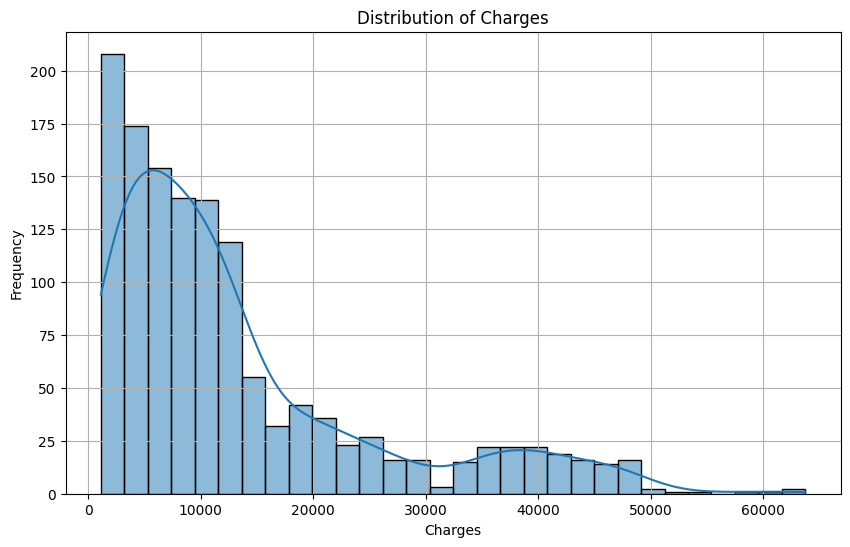

In [10]:
# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df_encoded["charges"], bins=30, kde=True)
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [11]:

correlation_matrix = cleaned_df_encoded.corr()
correlation_matrix

age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
f64,f64,f64,f64,f64,f64,f64
1.0,0.109272,0.042469,0.299008,-0.020856,0.025019,-0.002127
0.109272,1.0,0.012759,0.198341,0.046371,-0.00375,-0.157566
0.042469,0.012759,1.0,0.067998,0.017163,-0.007673,-0.016569
0.299008,0.198341,0.067998,1.0,0.057292,-0.787251,0.006208
-0.020856,0.046371,0.017163,0.057292,1.0,-0.076185,-0.004588
0.025019,-0.00375,-0.007673,-0.787251,-0.076185,1.0,-0.002181
-0.002127,-0.157566,-0.016569,0.006208,-0.004588,-0.002181,1.0


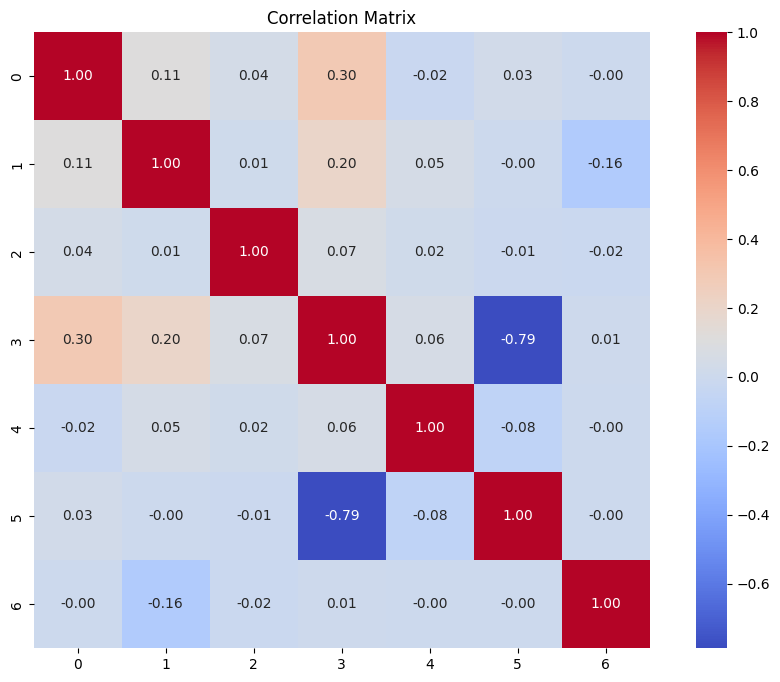

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

## Understanding the Correlation Matrix

A correlation matrix shows the correlation coefficients between variables in our dataset. The correlation coefficient ranges from -1 to 1:

- **1**: Perfect positive correlation - as one variable increases, the other increases linearly
- **0**: No correlation - no linear relationship between variables
- **-1**: Perfect negative correlation - as one variable increases, the other decreases linearly

### Key Insights from Our Correlation Matrix:

1. **Charges and Smoker**: The strongest correlation is between `charges` and `smoker_encoded` with a value of -0.79. This negative correlation exists because in our encoding, smokers are labeled as 0 and non-smokers as 1 (no=1, yes=0). Therefore, this indicates that being a smoker (0) is strongly associated with higher insurance charges.

2. **Age and Charges**: With a correlation of 0.30, there's a moderate positive relationship between age and insurance charges. As age increases, insurance charges tend to increase as well.

3. **BMI and Charges**: There's a weak positive correlation (0.20) between BMI and charges, suggesting higher BMI is somewhat associated with higher insurance costs.

4. **BMI and Region**: There's a weak negative correlation (-0.16) between BMI and region_encoded, which might suggest regional differences in BMI patterns.

5. **Other variables** show minimal correlation with each other, as indicated by values close to 0.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features and target variable
X = cleaned_df_encoded.drop("charges").to_numpy()
y = cleaned_df_encoded["charges"].to_numpy().flatten()
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardizing the features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()
# Checking the shapes of the datasets
X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((1070, 6), (268, 6), (1070,), (268,))

# Build the Model

In [14]:
import os 
os.environ["KERAS_BACKEND"] = "jax"
import keras

In [15]:
# check keras backend 
keras.backend.backend() # should be jax

'jax'

In [16]:
def medical_cost_model(input_shape):
    inputs = keras.Input(shape=input_shape, name="input_layer")
    x = keras.layers.Dense(64, activation="relu")(inputs)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(32, activation="relu")(x)
    x = keras.layers.Dropout(0.2)(x)
    outputs = keras.layers.Dense(1)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [17]:
model = medical_cost_model(input_shape=(X_train_scaled.shape[1],))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,561 (10.00 KB)

 Trainable params: 2,561 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# compile the model 
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_squared_error",
    metrics=["mean_absolute_error"]
)

In [19]:
hist = model.fit(
    X_train_scaled,
    y_train_scaled,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)],
)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.0501 - mean_absolute_error: 0.7866 - val_loss: 0.6047 - val_mean_absolute_error: 0.6209
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5491 - mean_absolute_error: 0.5860 - val_loss: 0.3381 - val_mean_absolute_error: 0.4252
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.4020 - mean_absolute_error: 0.4599 - val_loss: 0.2341 - val_mean_absolute_error: 0.3420
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.3207 - mean_absolute_error: 0.3967 - val_loss: 0.2065 - val_mean_absolute_error: 0.3218
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.2783 - mean_absolute_error: 0.3748 - val_loss: 0.1852 - val_mean_absolute_error: 0.3066
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.2803 - mean_absolute_error: 0.3723 - val_loss: 0.1771 - val_mean_absolute_error: 0.2731
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.2489 - mean_absolute_error: 0.3503

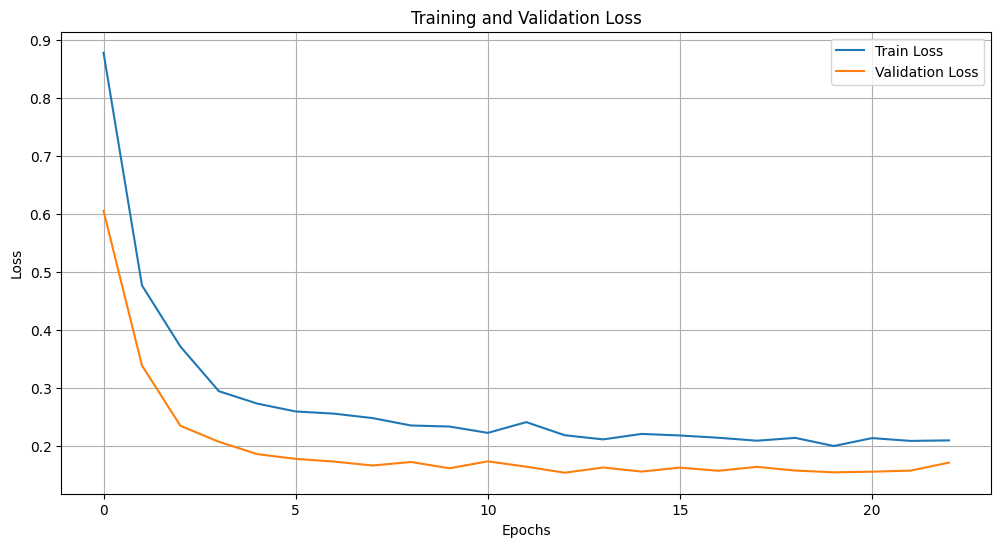

In [20]:
# visualize the training process
plt.figure(figsize=(12, 6))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()